In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from datetime import date
from datetime import datetime
import itertools
import statsmodels.api as sm
import warnings
from statsmodels.tsa.arima_model import ARMA
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.preprocessing import StandardScaler as SS

In [2]:
rfr=pd.read_csv('c:/python/sgi_gdp_russia.csv',sep=';',decimal=',')
rfr.index=rfr.year
rfr1=rfr[(rfr.index<2017)&(rfr.index>1995)][rfr.columns[1:]]
rfr1.head()

,SGR,GINI,GPI,HDI,GIR,ER,Footprint,Biocapacity,GDP,GDP_growth,GDP_per_capita,GDP_Annual_growth,DowJons_in,Energy_Intensity_index
year,,,,,,,,,,,,,,
1996,0.14,38.4,NaN,0.709,NaN,0.8,0.47,0.640,419522.0,-0.036,2.833,0.133,NaN,14.39
1997,0.14,38.1,NaN,0.710,NaN,0.9,0.48,0.658,433619.0,0.014,2.934,0.252,NaN,13.56
1998,0.16,37.4,NaN,0.718,NaN,1.0,0.43,0.629,290231.0,-0.053,1.969,0.036,NaN,13.99
1999,0.18,37.1,NaN,0.720,NaN,1.1,0.43,0.638,20977.0,0.064,1.428,-0.329,NaN,13.62
2000,0.13,36.9,NaN,0.727,NaN,1.2,0.43,0.650,278075.0,0.100,1.899,-0.275,NaN,12.59


In [3]:
rfr=pd.read_csv('c:/python/sgi_in_russia.csv',sep='\t',decimal=',')
rfr.index=rfr.year
rfr2=rfr[(rfr.index<2017)&(rfr.index>1995)][rfr.columns[1:]]
rfr2.head()

,FSI,SGR,EROI,PRP,ES,ROEnv,RoL,ROEsr,RER,CR,...,ROA,ROE,EBIT,WACC,RG,NPG,NAG,FL,DOL,DER
year,,,,,,,,,,,,,,,,,,,,,
1996,0.25,0.1434,0.4300,0.17,2300.0,0.0350,0.0365,0.0225,0.2315,1.48,...,0.1373,0.1851,7.9230,0.0845,1.1690,-0.2340,-0.1180,1.4299,0.3763,0.3692
1997,0.26,0.1400,0.4500,0.16,2330.0,0.0500,0.0479,0.0275,0.2973,1.90,...,0.1274,0.1719,11.6525,0.0855,1.1659,0.2340,0.1180,1.4216,0.3716,0.3214
1998,0.21,0.1647,0.4400,0.17,2350.0,0.0562,0.0694,0.0350,0.4166,1.34,...,0.1507,0.2648,16.9833,0.0894,0.7895,0.1442,0.1447,1.4954,0.3924,0.7326
1999,0.19,0.1754,0.4375,0.17,2380.0,0.0339,0.0656,0.0413,0.5338,1.40,...,0.1481,0.2338,17.0332,0.0893,0.8730,0.0607,0.0150,1.4364,0.0040,0.5819
2000,0.23,0.1323,0.4375,0.17,2390.0,0.0525,0.0485,0.0470,0.3864,1.43,...,0.0962,0.1543,12.3710,0.1050,1.0248,-0.0953,-0.0227,1.5192,-0.1936,0.6012


In [4]:
rfr=pd.read_csv('c:/python/sgi_gdp_china.csv',sep=';',decimal=',')
rfr.index=rfr.year
rfc1=rfr[(rfr.index<2017)&(rfr.index>1995)][rfr.columns[1:]]
rfc1.columns=rfr1.columns
rfc1.head()

,SGR,GINI,GPI,HDI,GIR,ER,Footprint,Biocapacity,GDP,GDP_growth,GDP_per_capita,GDP_Annual_growth,DowJons_in,Energy_Intensity_index
year,,,,,,,,,,,,,,
1996,0.002000,35.3,NaN,0.550,NaN,0.3,1.3,2.0,867224.0,0.099,709.0,0.165,NaN,13.30
1997,0.001790,35.3,NaN,0.559,NaN,0.2,1.2,2.0,965338.0,0.092,781.0,0.102,NaN,12.70
1998,0.000780,35.3,NaN,0.568,NaN,0.1,1.4,2.0,1032570.0,0.078,828.0,0.060,NaN,11.36
1999,0.008700,38.7,NaN,0.576,NaN,0.2,1.5,2.0,1097140.0,0.077,872.0,0.054,NaN,10.76
2000,0.010008,38.7,NaN,0.585,NaN,0.2,1.6,2.0,1214920.0,0.085,959.0,0.099,NaN,10.23


In [5]:
rfr=pd.read_csv('c:/python/sgi_in_china.csv',sep=';',decimal=',')
rfr.index=rfr.year
rfc2=rfr[(rfr.index<2017)&(rfr.index>1995)][rfr.columns[1:]]
rfc2.columns=rfr2.columns
rfc2.head()

,FSI,SGR,EROI,PRP,ES,ROEnv,RoL,ROEsr,RER,CR,...,ROA,ROE,EBIT,WACC,RG,NPG,NAG,FL,DOL,DER
year,,,,,,,,,,,,,,,,,,,,,
1996,0.11,0.0020,0.10,0.1837,1800.0,0.0,0.00,0.03,0.0,0.8,...,0.2635,0.2798,19.1,0.06,0.3552,0.1914,0.1770,0.3748,0.6903,0.8210
1997,0.10,0.0018,0.11,0.1837,1700.0,0.0,0.08,0.04,0.3,0.8,...,0.2635,0.2798,19.1,0.07,0.3552,0.1914,0.1770,0.3748,0.6903,0.8210
1998,0.11,0.0008,0.11,0.1837,1600.0,0.0,0.07,0.05,0.3,0.9,...,0.2429,0.2636,18.0,0.06,0.1553,0.2790,0.2548,0.3042,1.6737,0.8244
1999,0.09,0.0087,0.12,0.1837,1600.0,0.0,0.06,0.04,0.3,0.7,...,0.2010,0.2118,17.0,0.08,0.2677,-0.1372,0.1568,0.3487,-1.7519,0.8256
2000,0.18,0.0100,0.13,0.1837,1500.0,0.0,0.08,0.03,0.3,0.8,...,0.1333,0.1591,18.0,0.60,-0.0175,0.3410,0.1648,0.2867,0.8823,0.8805


# Россия, внешние нефинансовые показатели
(B) GINI index (World Bank estimate); (D) Human Development Index (HDI); (F)Environmental rating ; (G)Footprint; (H)Biocapacity; (N) Energy Intensity Index

In [6]:
X_columns=['GINI','HDI','ER','Footprint','Biocapacity','Energy_Intensity_index']
rfr1[X_columns].head()

,GINI,HDI,ER,Footprint,Biocapacity,Energy_Intensity_index
year,,,,,,
1996,38.4,0.709,0.8,0.47,0.640,14.39
1997,38.1,0.710,0.9,0.48,0.658,13.56
1998,37.4,0.718,1.0,0.43,0.629,13.99
1999,37.1,0.720,1.1,0.43,0.638,13.62
2000,36.9,0.727,1.2,0.43,0.650,12.59


In [7]:
ssor1=SS().fit(rfr1.fillna(rfr1.mean()))
sssr1=SS().fit(rfr1[['SGR']])
scc1=pd.DataFrame(ssor1.transform(rfc1.fillna(rfc1.mean())),index=rfc1.index,columns=rfc1.columns)
scr1=pd.DataFrame(ssor1.transform(rfr1.fillna(rfr1.mean())),index=rfr1.index,columns=rfr1.columns)

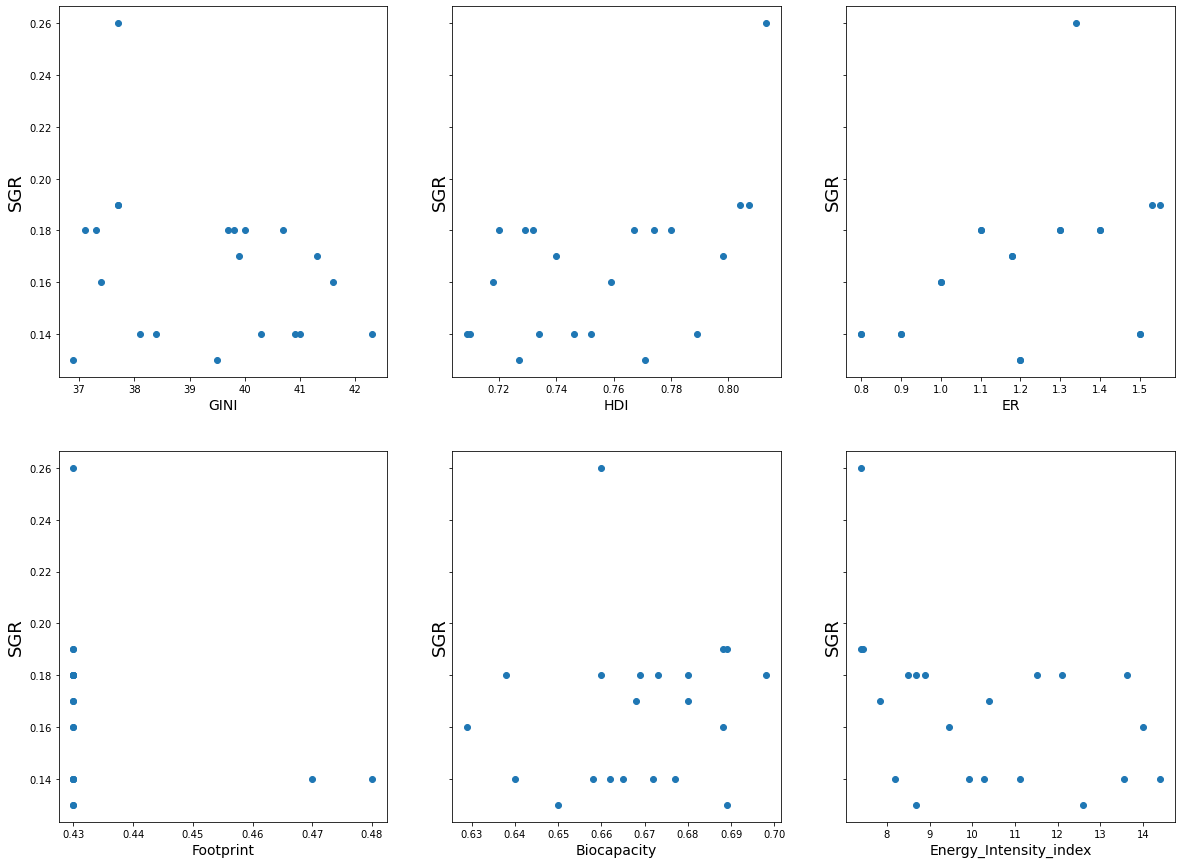

In [8]:
f, ax = plt.subplots(2, 3, sharey=True,figsize=(20,15))
for num,el in enumerate(X_columns):
    yy=int(num/3)
    xx=num%3
    ax[yy,xx].scatter(rfr1[el],rfr1.SGR)
    ax[yy,xx].set_ylabel('SGR',fontsize=18)
    ax[yy,xx].set_xlabel(el,fontsize=14)
    

In [9]:
ls=Lasso(alpha=0.02).fit(scr1[X_columns],scr1.SGR)
XX=np.array(X_columns)
np.array(list(zip(XX[np.abs(ls.coef_)>0.001],ls.coef_[np.abs(ls.coef_)>0.001])))

array([['GINI', '-0.32923498681196994'],
       ['HDI', '0.5665218313920314'],
       ['Footprint', '-0.10350095408100635'],
       ['Biocapacity', '-0.09608792826256152']], dtype='<U20')

In [11]:
m1 = smf.ols('SGR ~ GINI + HDI',data=scr1)
fitted = m1.fit(cov_type='HC1')
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    SGR   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     3.949
Date:                Sat, 15 Aug 2020   Prob (F-statistic):             0.0378
Time:                        20:25:33   Log-Likelihood:                -24.156
No. Observations:                  21   AIC:                             54.31
Df Residuals:                      18   BIC:                             57.44
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.274e-16      0.180   2.93e-15      1.0

In [20]:
scr1[['SGR']].describe()

,SGR
count,2.100000e+01
mean,5.498247e-16
std,1.024695e+00
min,-1.222790e+00
25%,-8.804088e-01
50%,1.467348e-01
75%,4.891160e-01
max,3.228166e+00


In [21]:
rfr1[['SGR']].describe()

,SGR
count,21.000000
mean,0.165714
std,0.029928
min,0.130000
25%,0.140000
50%,0.170000
75%,0.180000
max,0.260000


array([-1.22278997, -0.1100511 ,  1.00268778,  2.11542665,  3.22816552])

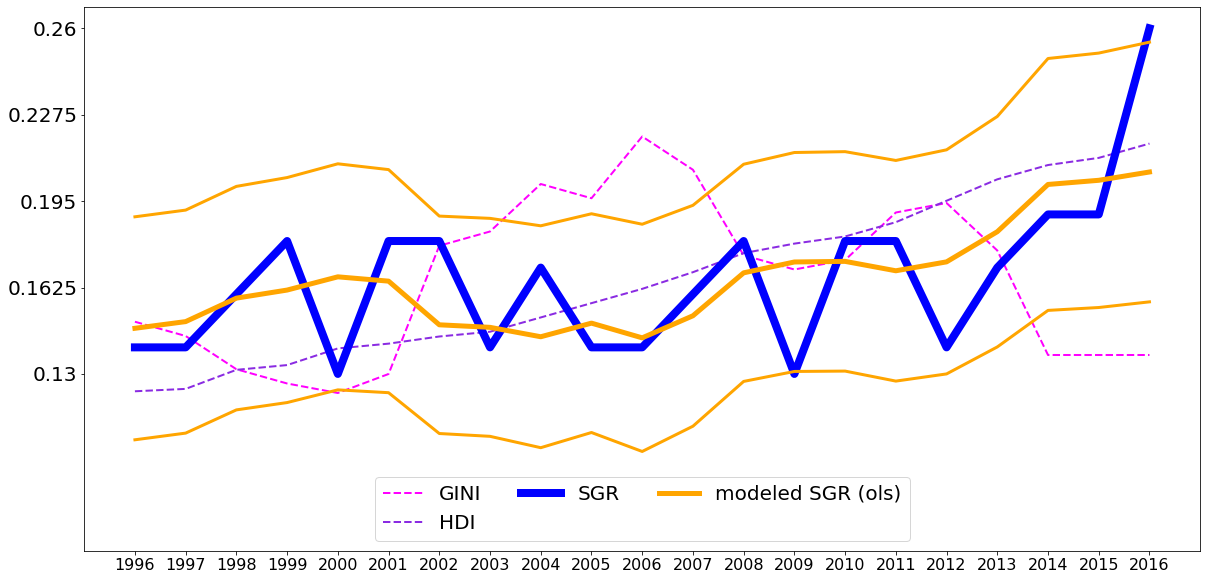

In [26]:
yuyr=np.linspace(rfr1.SGR.min(),rfr1.SGR.max(),5)
yuyf=np.linspace(scr1.SGR.min(),scr1.SGR.max(),5)

predictions = fitted.get_prediction(scr1)
frame = predictions.summary_frame(alpha=0.1)
frame.index=scr1.index
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 20
plt.ylim((-3.5,3.5))
plt.plot(scr1['GINI'],linewidth=2,color='magenta',ls='--') 
plt.plot(scr1['HDI'],linewidth=2,color='blueviolet',ls='--') 
plt.plot(scr1[['SGR']],linewidth=8,color='blue')
plt.plot(frame['mean'],linewidth=5,color='orange')
plt.plot(frame['obs_ci_lower'],linewidth=3,color='orange')
plt.plot(frame['obs_ci_upper'],linewidth=3,color='orange')

plt.legend(['GINI', 'HDI','SGR', 'modeled SGR (ols)'], 
           loc="lower center",ncol=3)
plt.xticks(range(1996,2017),range(1996,2017),fontsize=16)
plt.yticks(yuyf,yuyr)
plt.show()

# Россия, внешние финансовые показатели

In [27]:
X_columns=['GDP','GDP_growth','GDP_per_capita','GDP_Annual_growth']
rfr1[X_columns].head()

,GDP,GDP_growth,GDP_per_capita,GDP_Annual_growth
year,,,,
1996,419522.0,-0.036,2.833,0.133
1997,433619.0,0.014,2.934,0.252
1998,290231.0,-0.053,1.969,0.036
1999,20977.0,0.064,1.428,-0.329
2000,278075.0,0.100,1.899,-0.275


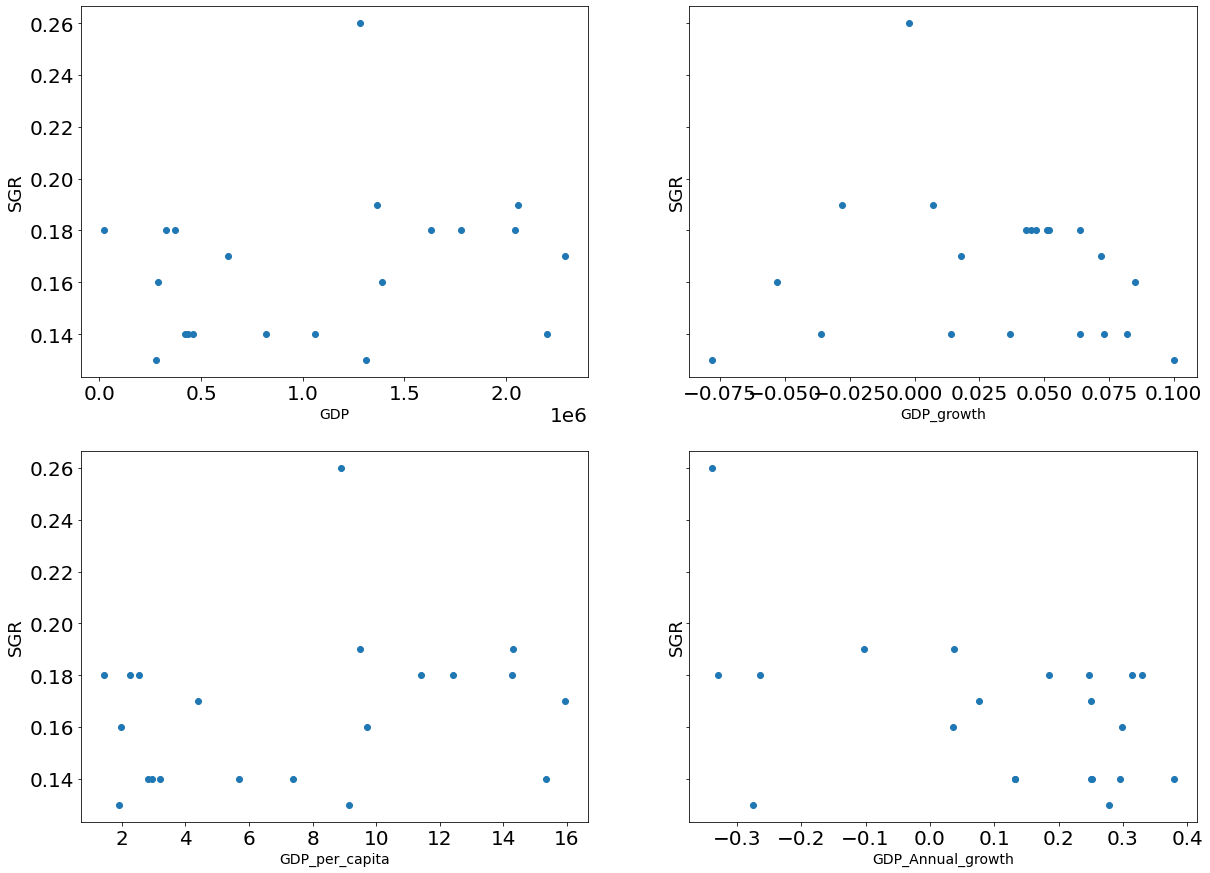

In [28]:
f, ax = plt.subplots(2, 2, sharey=True,figsize=(20,15))
for num,el in enumerate(X_columns):
    yy=int(num/2)
    xx=num%2
    ax[yy,xx].scatter(rfr1[el],rfr1.SGR)
    ax[yy,xx].set_ylabel('SGR',fontsize=18)
    ax[yy,xx].set_xlabel(el,fontsize=14)
    

## Видна нелинейная зависимость на GDP_growth. Добавим ее квадрат

In [29]:
scr1['GDP_growth2']=scr1['GDP_growth']**2
X_columns=X_columns+['GDP_growth2']

In [30]:
ls=Lasso(alpha=0.02).fit(scr1[X_columns],scr1.SGR)
XX=np.array(X_columns)
np.array(list(zip(XX[np.abs(ls.coef_)>0.001],ls.coef_[np.abs(ls.coef_)>0.001])))

array([['GDP', '0.09365594251904641'],
       ['GDP_growth', '-0.36716697572075896'],
       ['GDP_Annual_growth', '-0.42633437975703864'],
       ['GDP_growth2', '-0.43102439770027656']], dtype='<U20')

In [31]:
m1 = smf.ols('SGR ~ GDP_growth + GDP_Annual_growth + GDP_growth2',data=scr1)
fitted = m1.fit(cov_type='HC1')
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    SGR   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     5.075
Date:                Sat, 15 Aug 2020   Prob (F-statistic):             0.0109
Time:                        20:44:47   Log-Likelihood:                -22.772
No. Observations:                  21   AIC:                             53.54
Df Residuals:                      17   BIC:                             57.72
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.4942      0.27

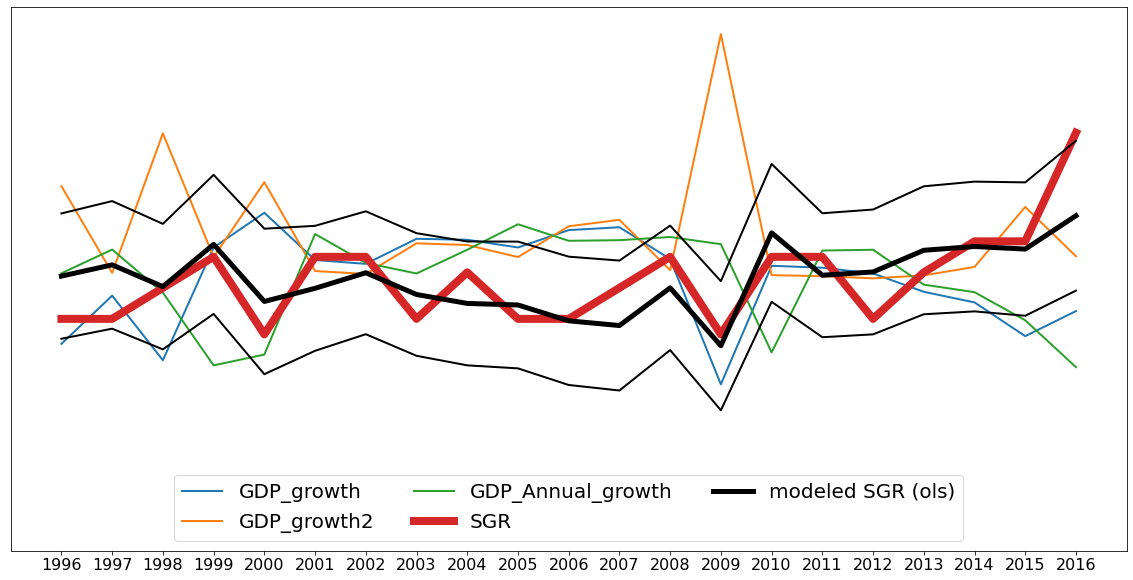

In [32]:
predictions = fitted.get_prediction(scr1)
frame = predictions.summary_frame(alpha=0.1)
frame.index=scr1.index
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 20
plt.ylim((-6,6))
plt.plot(scr1[['GDP_growth', 'GDP_growth2', 'GDP_Annual_growth']],linewidth=2) 
plt.plot(scr1[['SGR']],linewidth=8)
plt.plot(frame['mean'],linewidth=5,color='black')
plt.plot(frame['obs_ci_lower'],linewidth=2,color='black')
plt.plot(frame['obs_ci_upper'],linewidth=2,color='black')

plt.legend(['GDP_growth', 'GDP_growth2', 'GDP_Annual_growth','SGR', 'modeled SGR (ols)'], 
           loc="lower center",ncol=3)
plt.xticks(range(1996,2017),range(1996,2017),fontsize=16)
plt.yticks([],[])
plt.show()

# Китай, внешние нефинансовые показатели

In [33]:
X_columns=['GINI','HDI','ER','Footprint','Biocapacity','Energy_Intensity_index']
rfc1[X_columns].head()

,GINI,HDI,ER,Footprint,Biocapacity,Energy_Intensity_index
year,,,,,,
1996,35.3,0.550,0.3,1.3,2.0,13.30
1997,35.3,0.559,0.2,1.2,2.0,12.70
1998,35.3,0.568,0.1,1.4,2.0,11.36
1999,38.7,0.576,0.2,1.5,2.0,10.76
2000,38.7,0.585,0.2,1.6,2.0,10.23


In [34]:
ssor1=SS().fit(rfc1.fillna(rfc1.mean()))
sssr1=SS().fit(rfc1[['SGR']])
scc1=pd.DataFrame(ssor1.transform(rfc1.fillna(rfc1.mean())),index=rfc1.index,columns=rfc1.columns)
scr1=pd.DataFrame(ssor1.transform(rfr1.fillna(rfr1.mean())),index=rfr1.index,columns=rfr1.columns)

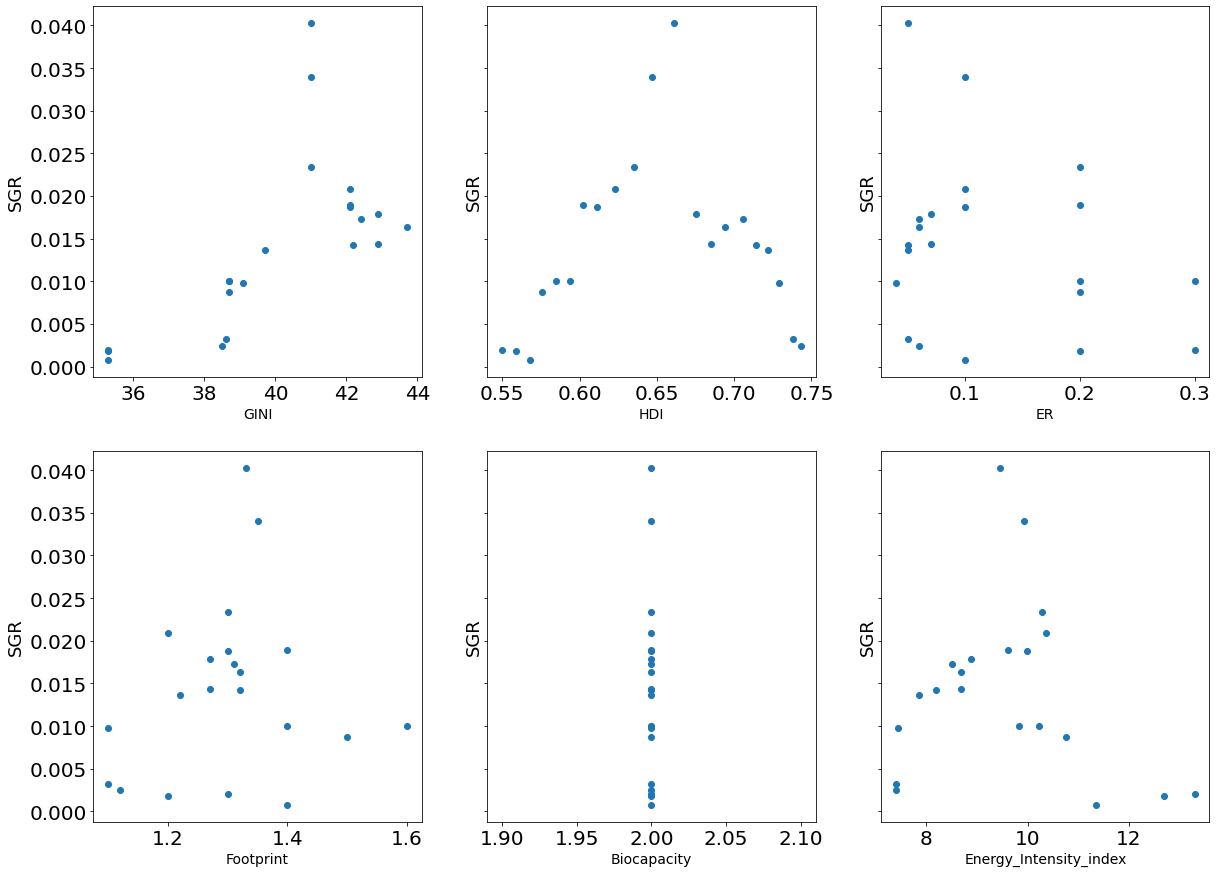

In [35]:
f, ax = plt.subplots(2, 3, sharey=True,figsize=(20,15))
for num,el in enumerate(X_columns):
    yy=int(num/3)
    xx=num%3
    ax[yy,xx].scatter(rfc1[el],rfc1.SGR)
    ax[yy,xx].set_ylabel('SGR',fontsize=18)
    ax[yy,xx].set_xlabel(el,fontsize=14)
    

## Видно, что у HDI нелинейная зависимость. Добавим ее квадрат в модель

In [36]:
scc1['HDI2']=scc1.HDI**2
X_columns=X_columns+['HDI2']

In [37]:
ls=Lasso(alpha=0.02).fit(scc1[X_columns],scc1.SGR)
XX=np.array(X_columns)
np.array(list(zip(XX[np.abs(ls.coef_)>0.001],ls.coef_[np.abs(ls.coef_)>0.001])))

array([['GINI', '-0.09445496901928337'],
       ['HDI', '0.2867924591627572'],
       ['ER', '-0.053928306997524704'],
       ['Energy_Intensity_index', '0.18936406372551842'],
       ['HDI2', '-1.1633011651273044']], dtype='<U22')

In [38]:
m1 = smf.ols('SGR ~ HDI + Energy_Intensity_index + HDI2',data=scc1)
fitted = m1.fit(cov_type='HC1')
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    SGR   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     18.41
Date:                Sat, 15 Aug 2020   Prob (F-statistic):           1.39e-05
Time:                        20:44:49   Log-Likelihood:                -13.831
No. Observations:                  21   AIC:                             35.66
Df Residuals:                      17   BIC:                             39.84
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1

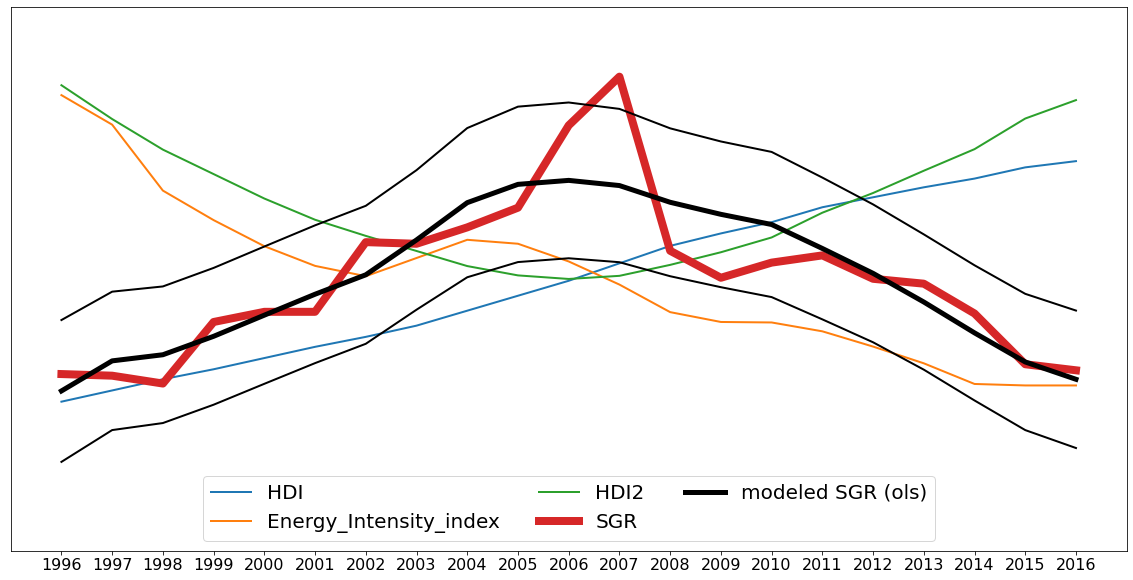

In [39]:
predictions = fitted.get_prediction(scc1)
frame = predictions.summary_frame(alpha=0.1)
frame.index=scc1.index
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 20
plt.ylim((-3.5,3.5))
plt.plot(scc1[['HDI', 'Energy_Intensity_index', 'HDI2']],linewidth=2) 
plt.plot(scc1[['SGR']],linewidth=8)
plt.plot(frame['mean'],linewidth=5,color='black')
plt.plot(frame['obs_ci_lower'],linewidth=2,color='black')
plt.plot(frame['obs_ci_upper'],linewidth=2,color='black')

plt.legend(['HDI', 'Energy_Intensity_index', 'HDI2','SGR', 'modeled SGR (ols)'], 
           loc="lower center",ncol=3)
plt.xticks(range(1996,2017),range(1996,2017),fontsize=16)
plt.yticks([],[])
plt.show()

# Китай, внешние финансовые показатели

In [40]:
X_columns=['GDP','GDP_growth','GDP_per_capita','GDP_Annual_growth']
rfc1[X_columns].head()

,GDP,GDP_growth,GDP_per_capita,GDP_Annual_growth
year,,,,
1996,867224.0,0.099,709.0,0.165
1997,965338.0,0.092,781.0,0.102
1998,1032570.0,0.078,828.0,0.060
1999,1097140.0,0.077,872.0,0.054
2000,1214920.0,0.085,959.0,0.099


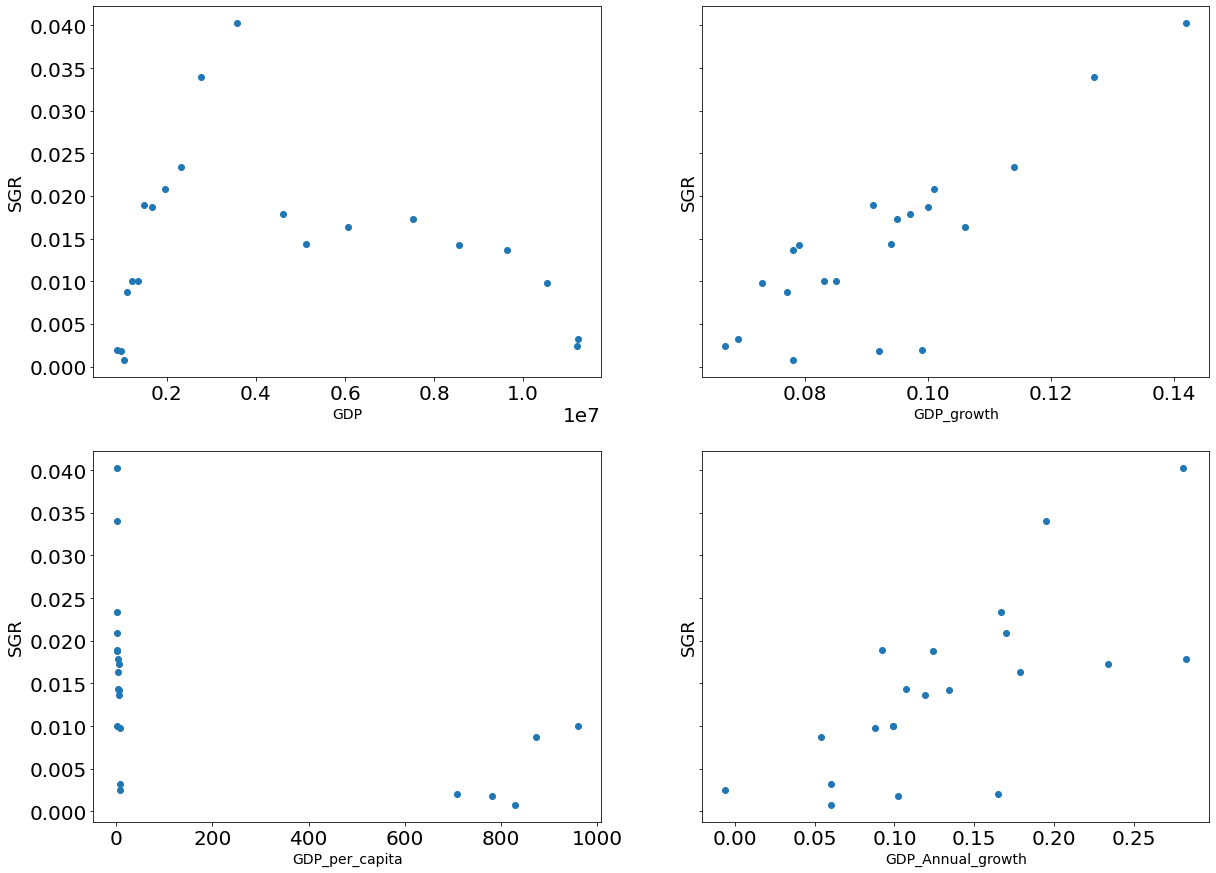

In [41]:
f, ax = plt.subplots(2, 2, sharey=True,figsize=(20,15))
for num,el in enumerate(X_columns):
    yy=int(num/2)
    xx=num%2
    ax[yy,xx].scatter(rfc1[el],rfc1.SGR)
    ax[yy,xx].set_ylabel('SGR',fontsize=18)
    ax[yy,xx].set_xlabel(el,fontsize=14)
    

## Добавим квадрат GDP из-за нелинейности зависимости

In [42]:
scc1['GPD2']=scc1.GDP**2
X_columns=X_columns+['GPD2']

In [43]:
X_columns

['GDP', 'GDP_growth', 'GDP_per_capita', 'GDP_Annual_growth', 'GPD2']

In [44]:
ls=Lasso(alpha=0.02).fit(scc1[X_columns],scc1.SGR)
XX=np.array(X_columns)
np.array(list(zip(XX[np.abs(ls.coef_)>0.001],ls.coef_[np.abs(ls.coef_)>0.001])))

array([['GDP_growth', '0.7033258362286121'],
       ['GDP_per_capita', '-0.34710612650203015'],
       ['GPD2', '-0.06027130637548178']], dtype='<U20')

In [45]:
m1 = smf.ols('SGR ~ GDP_growth + GDP_per_capita',data=scc1)
fitted = m1.fit(cov_type='HC1')
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    SGR   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     50.38
Date:                Sat, 15 Aug 2020   Prob (F-statistic):           4.22e-08
Time:                        20:44:57   Log-Likelihood:                -11.543
No. Observations:                  21   AIC:                             29.09
Df Residuals:                      18   BIC:                             32.22
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -1.11e-16      0.099  -1.12e

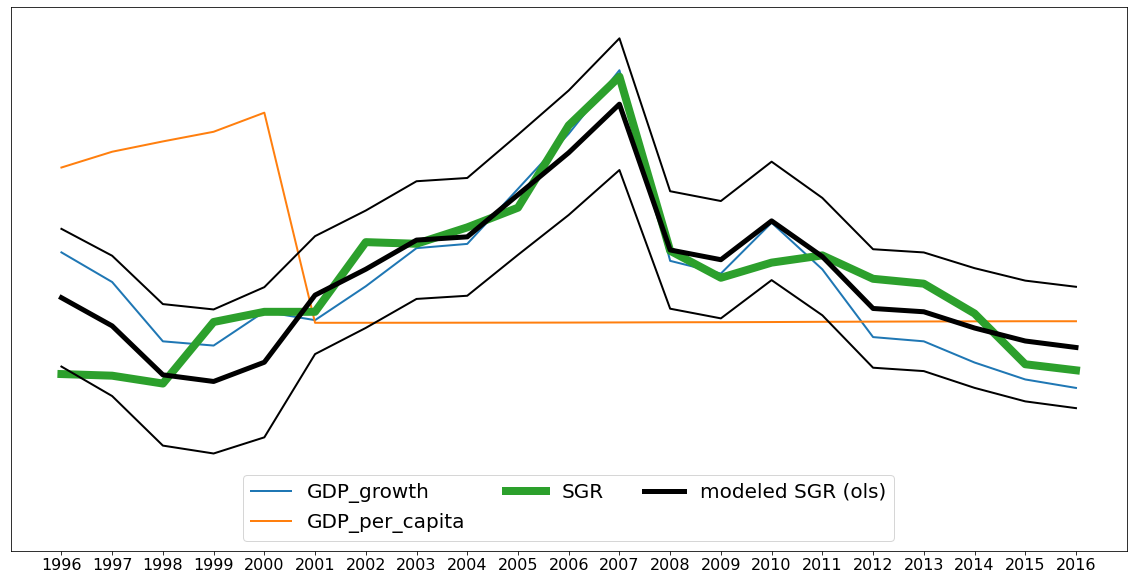

In [46]:
predictions = fitted.get_prediction(scc1)
frame = predictions.summary_frame(alpha=0.1)
frame.index=scr1.index
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 20
plt.ylim((-3.5,3.5))
plt.plot(scc1[['GDP_growth','GDP_per_capita']],linewidth=2) 
plt.plot(scc1[['SGR']],linewidth=8)
plt.plot(frame['mean'],linewidth=5,color='black')
plt.plot(frame['obs_ci_lower'],linewidth=2,color='black')
plt.plot(frame['obs_ci_upper'],linewidth=2,color='black')

plt.legend(['GDP_growth','GDP_per_capita','SGR', 'modeled SGR (ols)'], 
           loc="lower center",ncol=3)
plt.xticks(range(1996,2017),range(1996,2017),fontsize=16)
plt.yticks([],[])
plt.show()

# Россия Внутренние нефинансовые факторы

In [101]:
X_columns=['EROI', 'PRP', 'ES', 'ROEnv', 'RoL', 'ROEsr', 'RER']
rfr2[X_columns].head()

,EROI,PRP,ES,ROEnv,RoL,ROEsr,RER
year,,,,,,,
1996,0.4300,0.17,2300.0,0.0350,0.0365,0.0225,0.2315
1997,0.4500,0.16,2330.0,0.0500,0.0479,0.0275,0.2973
1998,0.4400,0.17,2350.0,0.0562,0.0694,0.0350,0.4166
1999,0.4375,0.17,2380.0,0.0339,0.0656,0.0413,0.5338
2000,0.4375,0.17,2390.0,0.0525,0.0485,0.0470,0.3864


In [102]:
ssor2=SS().fit(rfr2.fillna(rfr2.mean()))
sssr2=SS().fit(rfr2[['SGR']])
scc2=pd.DataFrame(ssor2.transform(rfc2.fillna(rfc2.mean())),index=rfc2.index,columns=rfc2.columns)
scr2=pd.DataFrame(ssor2.transform(rfr2.fillna(rfr2.mean())),index=rfr2.index,columns=rfr2.columns)

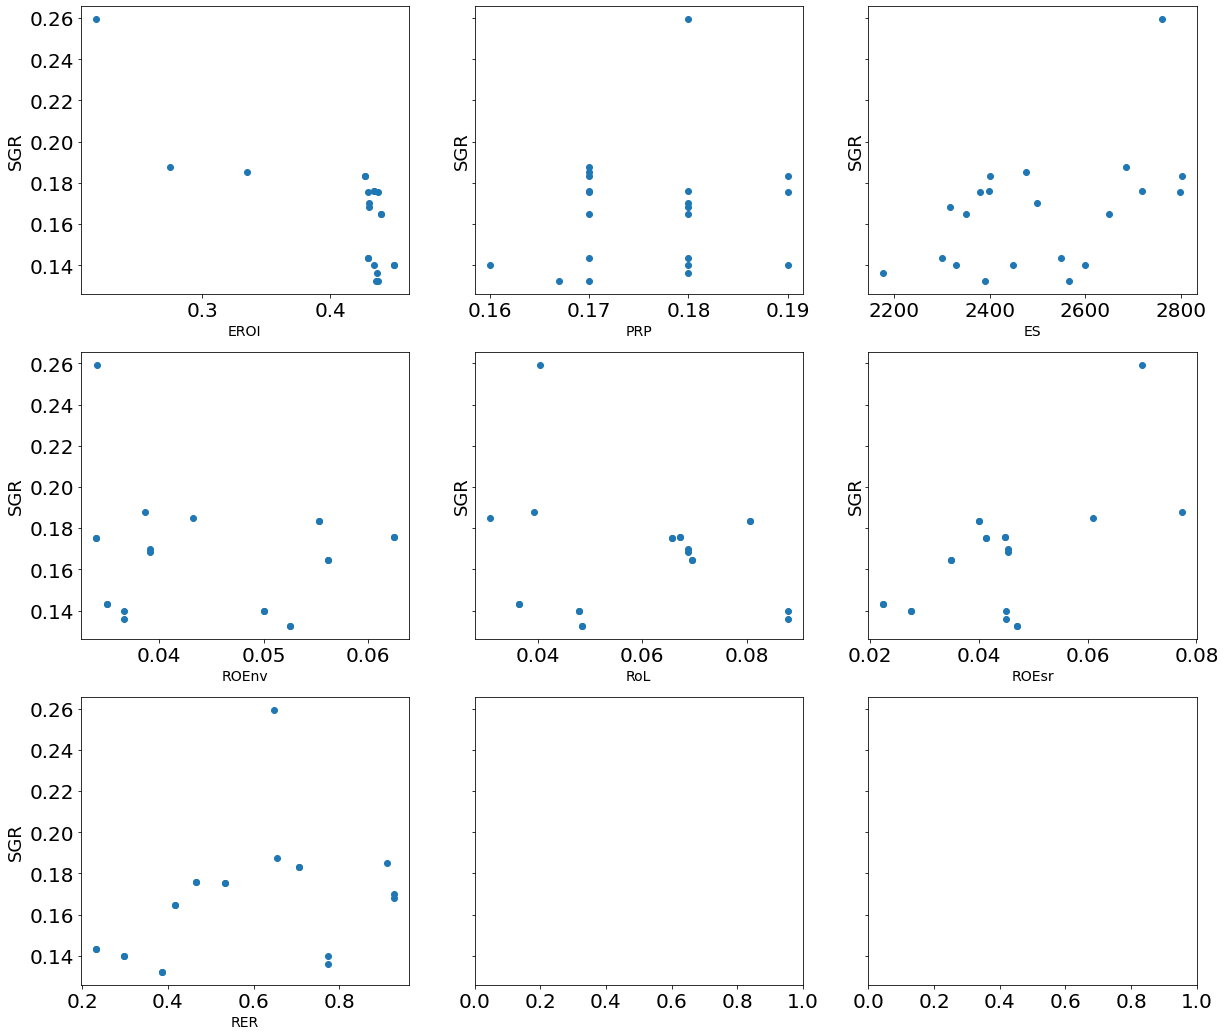

In [103]:
f, ax = plt.subplots(3, 3, sharey=True,figsize=(20,18))
for num,el in enumerate(X_columns):
    yy=int(num/3)
    xx=num%3
    ax[yy,xx].scatter(rfr2[el],rfr2.SGR)
    ax[yy,xx].set_ylabel('SGR',fontsize=18)
    ax[yy,xx].set_xlabel(el,fontsize=14)
    

In [104]:
ls=Lasso(alpha=0.1).fit(scr2[X_columns],scr2.SGR)
XX=np.array(X_columns)
np.array(list(zip(XX[np.abs(ls.coef_)>0.001],ls.coef_[np.abs(ls.coef_)>0.001])))

array([['EROI', '-0.6401910802417854'],
       ['ES', '0.16063431892323132'],
       ['RoL', '0.10732568358384091'],
       ['RER', '0.05553076896191765']], dtype='<U19')

In [105]:
m1 = smf.ols('SGR ~ EROI + RoL',data=scr2)
fitted = m1.fit(cov_type='HC1')
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    SGR   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     14.63
Date:                Sat, 15 Aug 2020   Prob (F-statistic):           0.000169
Time:                        21:00:41   Log-Likelihood:                -17.703
No. Observations:                  21   AIC:                             41.41
Df Residuals:                      18   BIC:                             44.54
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.718e-16      0.133   3.56e-15      1.0

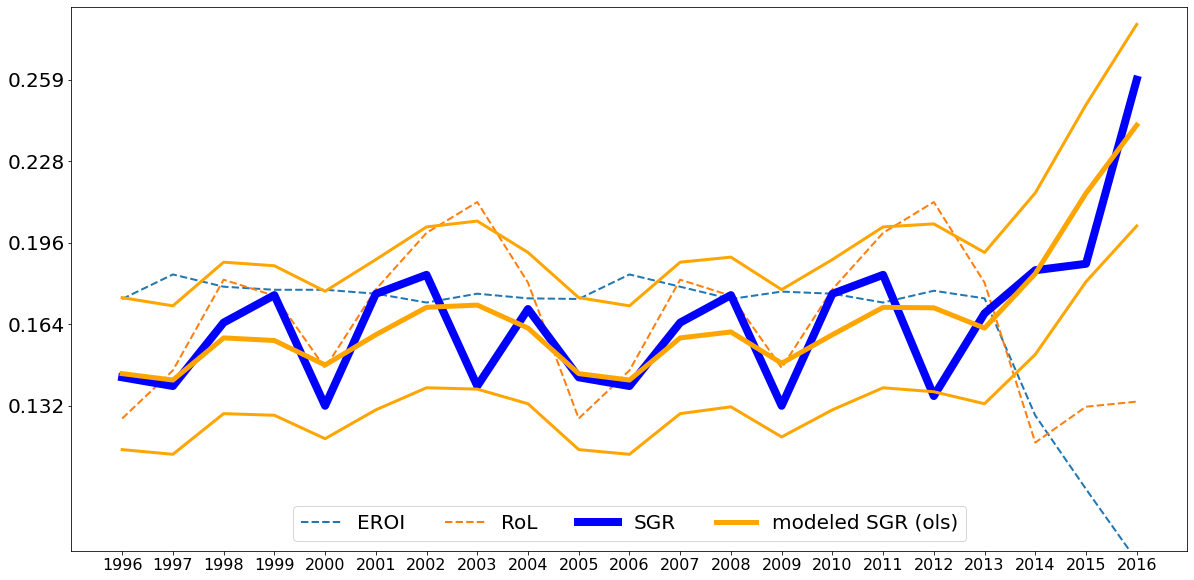

In [106]:
yuyr=np.round(np.linspace(rfr2.SGR.min(),rfr2.SGR.max(),5),3)
yuyf=np.linspace(scr2.SGR.min(),scr2.SGR.max(),5)
predictions = fitted.get_prediction(scr2)
frame = predictions.summary_frame(alpha=0.1)
frame.index=scr2.index
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 20
plt.ylim(yuyf[0]-2,yuyf[-1]+1)
plt.plot(scr2[['EROI', 'RoL']],linewidth=2,ls='--') 
plt.plot(scr2[['SGR']],linewidth=8,color='blue')
plt.plot(frame['mean'],linewidth=5,color='orange')
plt.plot(frame['obs_ci_lower'],linewidth=3,color='orange')
plt.plot(frame['obs_ci_upper'],linewidth=3,color='orange')

plt.legend(['EROI', 'RoL','SGR', 'modeled SGR (ols)'], 
           loc="lower center",ncol=4)
plt.xticks(range(1996,2017),range(1996,2017),fontsize=16)
plt.yticks(yuyf,yuyr)
plt.show()

# Россия, внутренние финансовые показатели


In [83]:
X_columns=['CR', 'NWCT', 'ROFA', 'ROS', 'ROCE', 'ROA', 'ROE', 'EBIT', 'WACC', 'RG',
           'NPG', 'NAG', 'FL', 'DOL', 'DER']
rfr2[X_columns].head()

,CR,NWCT,ROFA,ROS,ROCE,ROA,ROE,EBIT,WACC,RG,NPG,NAG,FL,DOL,DER
year,,,,,,,,,,,,,,,
1996,1.48,2.60,0.2506,0.8733,0.2351,0.1373,0.1851,7.9230,0.0845,1.1690,-0.2340,-0.1180,1.4299,0.3763,0.3692
1997,1.90,2.98,0.1888,0.2654,0.1961,0.1274,0.1719,11.6525,0.0855,1.1659,0.2340,0.1180,1.4216,0.3716,0.3214
1998,1.34,3.09,0.2271,0.3288,0.2550,0.1507,0.2648,16.9833,0.0894,0.7895,0.1442,0.1447,1.4954,0.3924,0.7326
1999,1.40,3.98,0.2150,0.2397,0.2228,0.1481,0.2338,17.0332,0.0893,0.8730,0.0607,0.0150,1.4364,0.0040,0.5819
2000,1.43,2.83,0.1387,0.2456,0.1407,0.0962,0.1543,12.3710,0.1050,1.0248,-0.0953,-0.0227,1.5192,-0.1936,0.6012


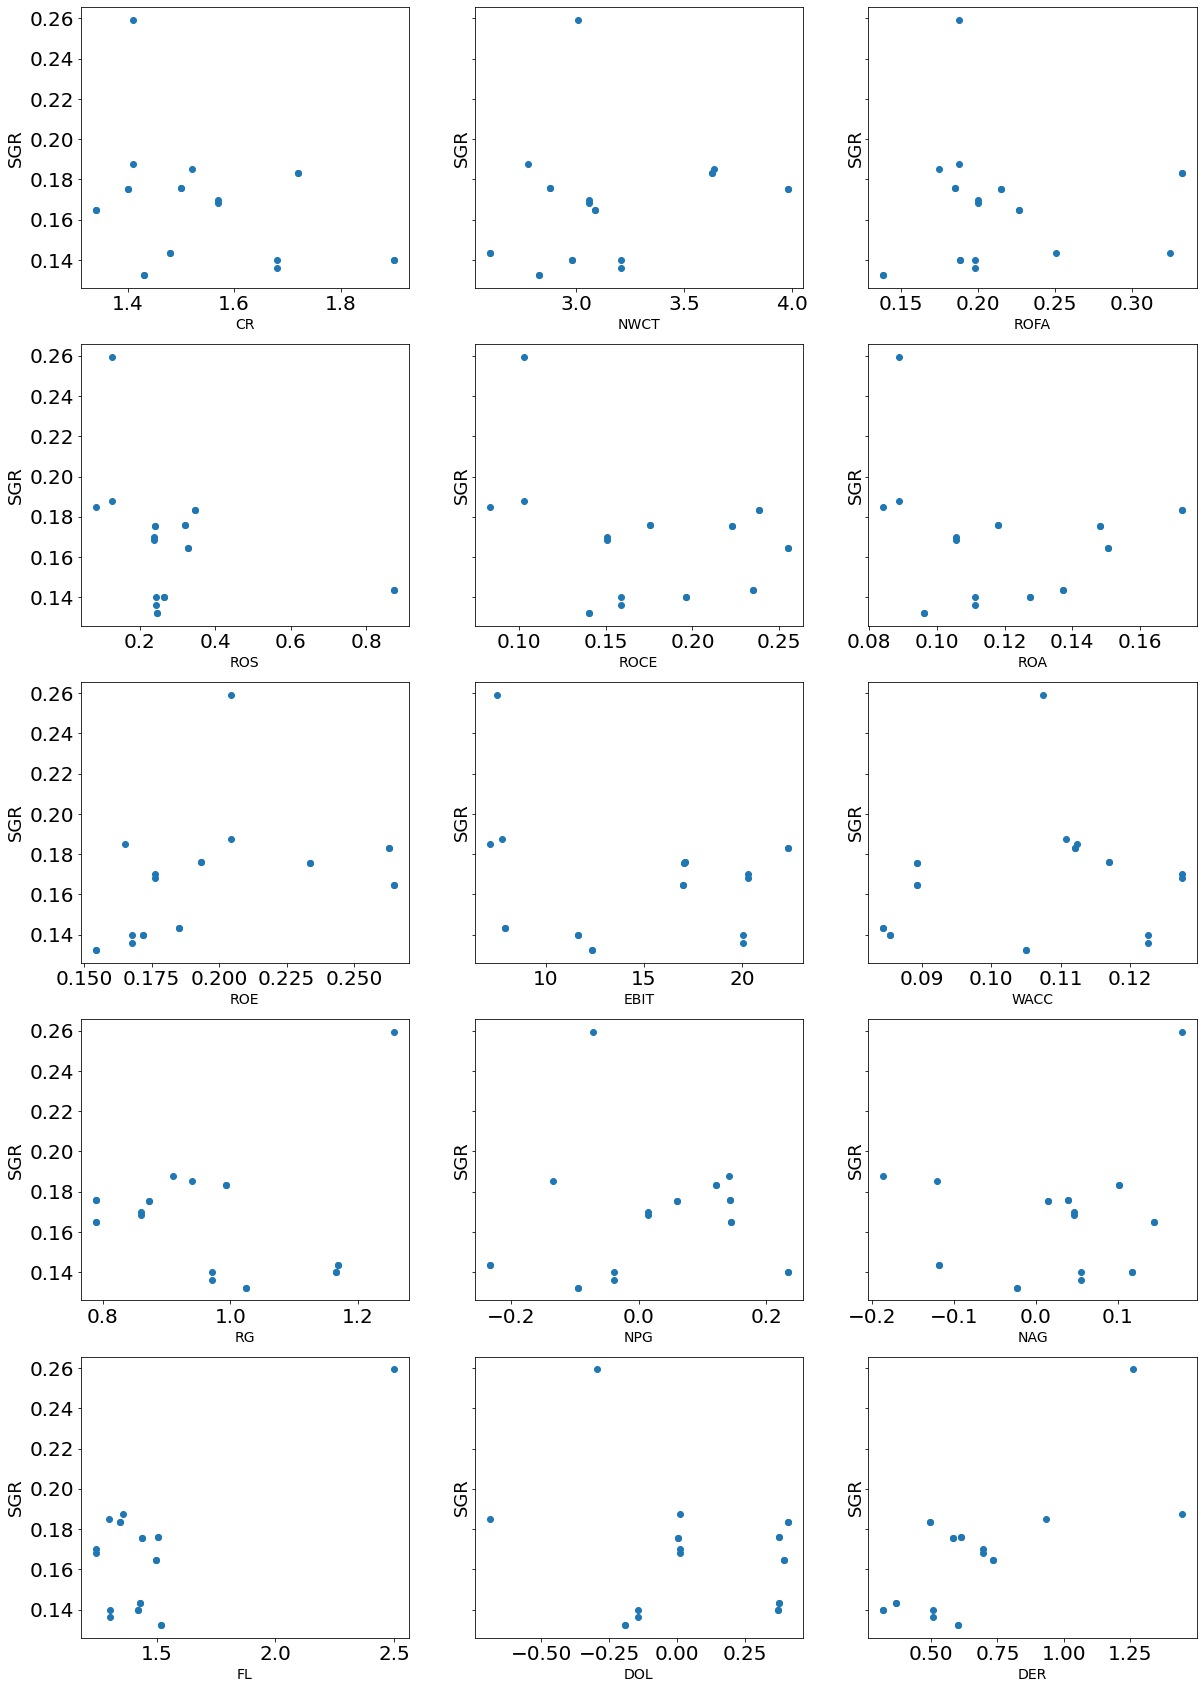

In [84]:
f, ax = plt.subplots(5, 3, sharey=True,figsize=(20,30))
for num,el in enumerate(X_columns):
    yy=int(num/3)
    xx=num%3
    ax[yy,xx].scatter(rfr2[el],rfr2.SGR)
    ax[yy,xx].set_ylabel('SGR',fontsize=18)
    ax[yy,xx].set_xlabel(el,fontsize=14)

In [85]:
ls=Lasso(alpha=0.1).fit(scr2[X_columns],scr2.SGR)
XX=np.array(X_columns)
np.array(list(zip(XX[np.abs(ls.coef_)>0.001],ls.coef_[np.abs(ls.coef_)>0.001])))

array([['NWCT', '0.19132566671098208'],
       ['ROFA', '0.13928928515339073'],
       ['ROE', '0.08161588169506165'],
       ['WACC', '0.08257709409374944'],
       ['FL', '0.41820716870117375'],
       ['DER', '0.4339134286837125']], dtype='<U19')

In [86]:
m1 = smf.ols('SGR ~ NWCT + ROFA + WACC + FL + DER',data=scr2)
fitted = m1.fit(cov_type='HC1')
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    SGR   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     134.3
Date:                Sat, 15 Aug 2020   Prob (F-statistic):           6.63e-12
Time:                        20:50:51   Log-Likelihood:                -7.4225
No. Observations:                  21   AIC:                             26.84
Df Residuals:                      15   BIC:                             33.11
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.163e-16      0.089   4.68e-15      1.0

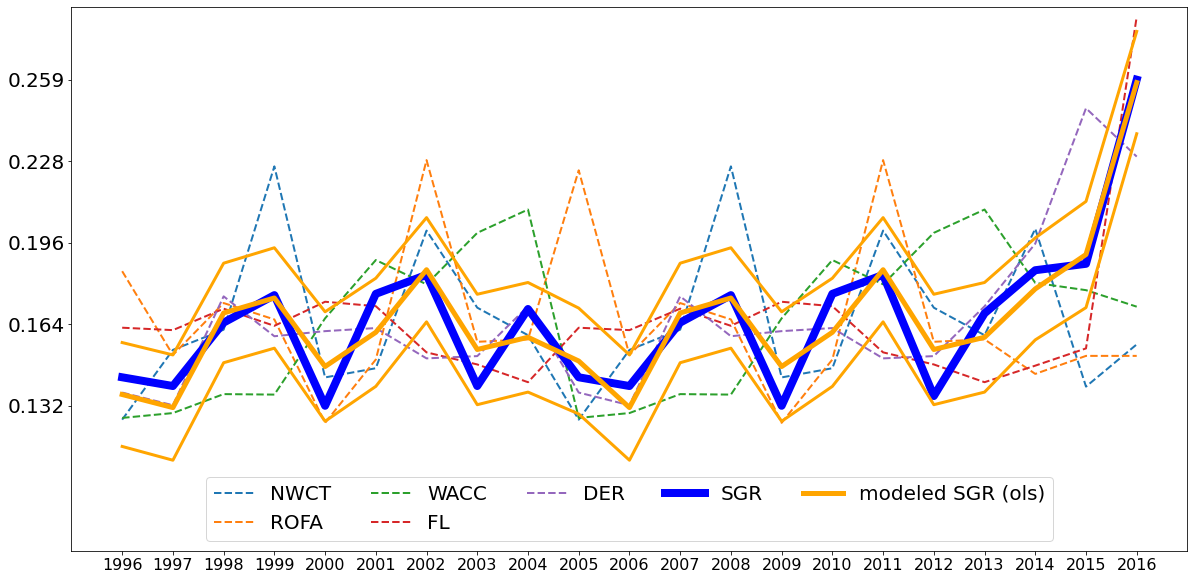

In [100]:
yuyr=np.round(np.linspace(rfr2.SGR.min(),rfr2.SGR.max(),5),3)
yuyf=np.linspace(scr2.SGR.min(),scr2.SGR.max(),5)
predictions = fitted.get_prediction(scr2)
frame = predictions.summary_frame(alpha=0.1)
frame.index=scr2.index
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 20
plt.ylim(yuyf[0]-2,yuyf[-1]+1)
plt.plot(scr2[['NWCT', 'ROFA', 'WACC', 'FL', 'DER']],linewidth=2,ls='--') 
plt.plot(scr2[['SGR']],linewidth=8,color='blue')
plt.plot(frame['mean'],linewidth=5,color='orange')
plt.plot(frame['obs_ci_lower'],linewidth=3,color='orange')
plt.plot(frame['obs_ci_upper'],linewidth=3,color='orange')

plt.legend(['NWCT', 'ROFA', 'WACC', 'FL', 'DER','SGR', 'modeled SGR (ols)'], 
           loc="lower center",ncol=5)
plt.xticks(range(1996,2017),range(1996,2017),fontsize=16)
plt.yticks(yuyf,yuyr)
plt.show()


# Китай, внутренние нефинансовые показатели


In [107]:
X_columns=['EROI', 'PRP', 'ES', 'ROEnv', 'RoL', 'ROEsr', 'RER']
rfc2[X_columns].head()

,EROI,PRP,ES,ROEnv,RoL,ROEsr,RER
year,,,,,,,
1996,0.10,0.1837,1800.0,0.0,0.00,0.03,0.0
1997,0.11,0.1837,1700.0,0.0,0.08,0.04,0.3
1998,0.11,0.1837,1600.0,0.0,0.07,0.05,0.3
1999,0.12,0.1837,1600.0,0.0,0.06,0.04,0.3
2000,0.13,0.1837,1500.0,0.0,0.08,0.03,0.3


In [108]:
ssor2=SS().fit(rfc2.fillna(rfc2.mean()))
sssr2=SS().fit(rfc2[['SGR']])
scc2=pd.DataFrame(ssor2.transform(rfc2.fillna(rfc2.mean())),index=rfc2.index,columns=rfc2.columns)
scr2=pd.DataFrame(ssor2.transform(rfr2.fillna(rfr2.mean())),index=rfr2.index,columns=rfr2.columns)

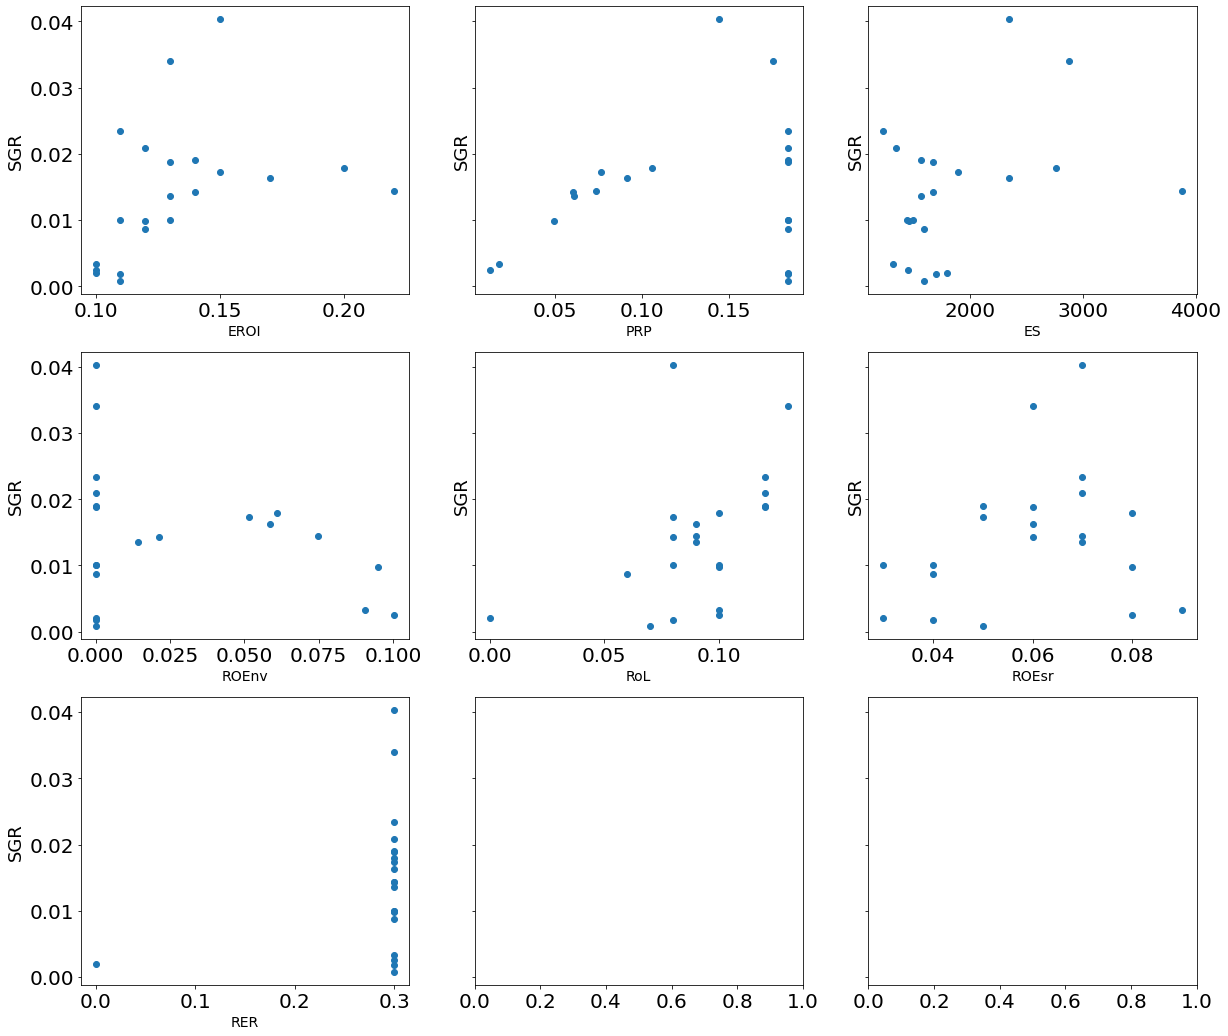

In [109]:
f, ax = plt.subplots(3, 3, sharey=True,figsize=(20,18))
for num,el in enumerate(X_columns):
    yy=int(num/3)
    xx=num%3
    ax[yy,xx].scatter(rfc2[el],rfc2.SGR)
    ax[yy,xx].set_ylabel('SGR',fontsize=18)
    ax[yy,xx].set_xlabel(el,fontsize=14)
    

## Добавим ROEsr в квадрате

In [110]:
scc2['ROEsr2']=scc2['ROEsr']**2
X_columns=X_columns+['ROEsr2']

In [111]:
ls=Lasso(alpha=0.1).fit(scc2[X_columns],scc2.SGR)
XX=np.array(X_columns)
np.array(list(zip(XX[np.abs(ls.coef_)>0.001],ls.coef_[np.abs(ls.coef_)>0.001])))

array([['EROI', '0.05968237568880148'],
       ['ES', '0.21581056263642973'],
       ['ROEnv', '-0.32252467834837006'],
       ['RoL', '0.22321520927583563'],
       ['ROEsr', '0.1590657112812551'],
       ['ROEsr2', '-0.18006107159490917']], dtype='<U20')

In [112]:
m1 = smf.ols('SGR ~ ES + ROEnv + ROEsr',data=scc2)
fitted = m1.fit(cov_type='HC1')
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    SGR   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     6.093
Date:                Sat, 15 Aug 2020   Prob (F-statistic):            0.00522
Time:                        21:05:10   Log-Likelihood:                -20.845
No. Observations:                  21   AIC:                             49.69
Df Residuals:                      17   BIC:                             53.87
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.939e-17      0.158   4.38e-16      1.0

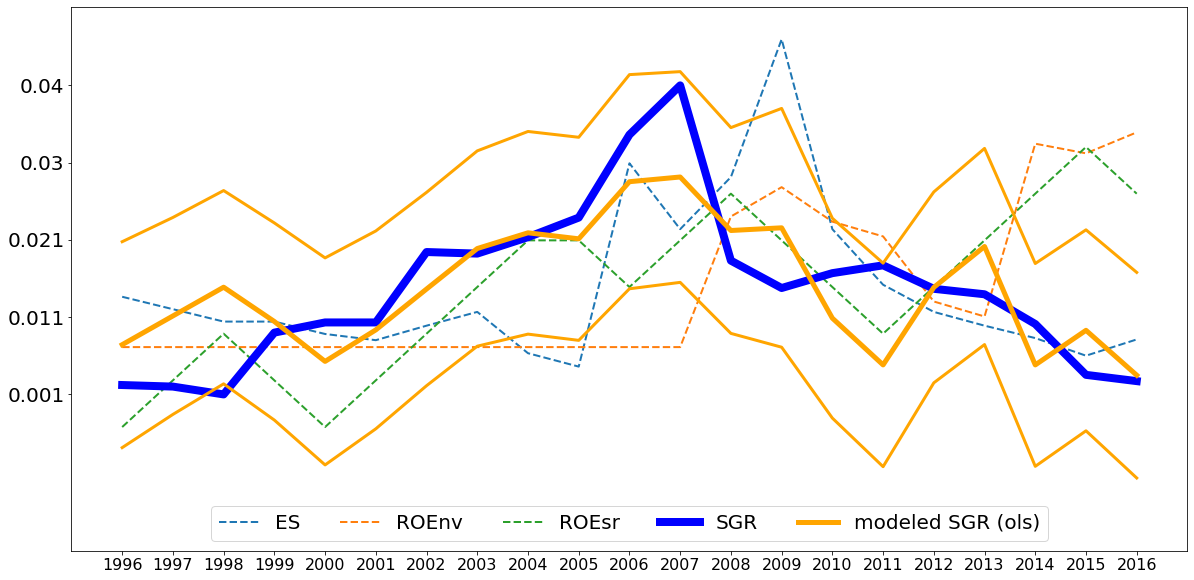

In [113]:
yuyr=np.round(np.linspace(rfc2.SGR.min(),rfc2.SGR.max(),5),3)
yuyf=np.linspace(scc2.SGR.min(),scc2.SGR.max(),5)
predictions = fitted.get_prediction(scc2)
frame = predictions.summary_frame(alpha=0.1)
frame.index=scc2.index
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 20
plt.ylim(yuyf[0]-2,yuyf[-1]+1)
plt.plot(scc2[['ES', 'ROEnv', 'ROEsr']],linewidth=2,ls='--') 
plt.plot(scc2[['SGR']],linewidth=8,color='blue')
plt.plot(frame['mean'],linewidth=5,color='orange')
plt.plot(frame['obs_ci_lower'],linewidth=3,color='orange')
plt.plot(frame['obs_ci_upper'],linewidth=3,color='orange')

plt.legend(['ES', 'ROEnv', 'ROEsr','SGR', 'modeled SGR (ols)'], 
           loc="lower center",ncol=5)
plt.xticks(range(1996,2017),range(1996,2017),fontsize=16)
plt.yticks(yuyf,yuyr)
plt.show()



# Китай, внутренние финансовые показатели


In [114]:
X_columns=['CR', 'NWCT', 'ROFA', 'ROS', 'ROCE', 'ROA', 'ROE', 'EBIT', 'WACC', 'RG',
           'NPG', 'NAG', 'FL', 'DOL', 'DER']
rfc2[X_columns].head()

,CR,NWCT,ROFA,ROS,ROCE,ROA,ROE,EBIT,WACC,RG,NPG,NAG,FL,DOL,DER
year,,,,,,,,,,,,,,,
1996,0.8,2.5,0.8870,0.2413,0.3343,0.2635,0.2798,19.1,0.06,0.3552,0.1914,0.1770,0.3748,0.6903,0.8210
1997,0.8,2.5,0.8870,0.2413,0.3343,0.2635,0.2798,19.1,0.07,0.3552,0.1914,0.1770,0.3748,0.6903,0.8210
1998,0.9,-1.5,0.8549,0.2072,0.3119,0.2429,0.2636,18.0,0.06,0.1553,0.2790,0.2548,0.3042,1.6737,0.8244
1999,0.7,3.4,0.8065,0.1718,0.2522,0.2010,0.2118,17.0,0.08,0.2677,-0.1372,0.1568,0.3487,-1.7519,0.8256
2000,0.8,3.7,0.6247,0.1176,0.1712,0.1333,0.1591,18.0,0.60,-0.0175,0.3410,0.1648,0.2867,0.8823,0.8805


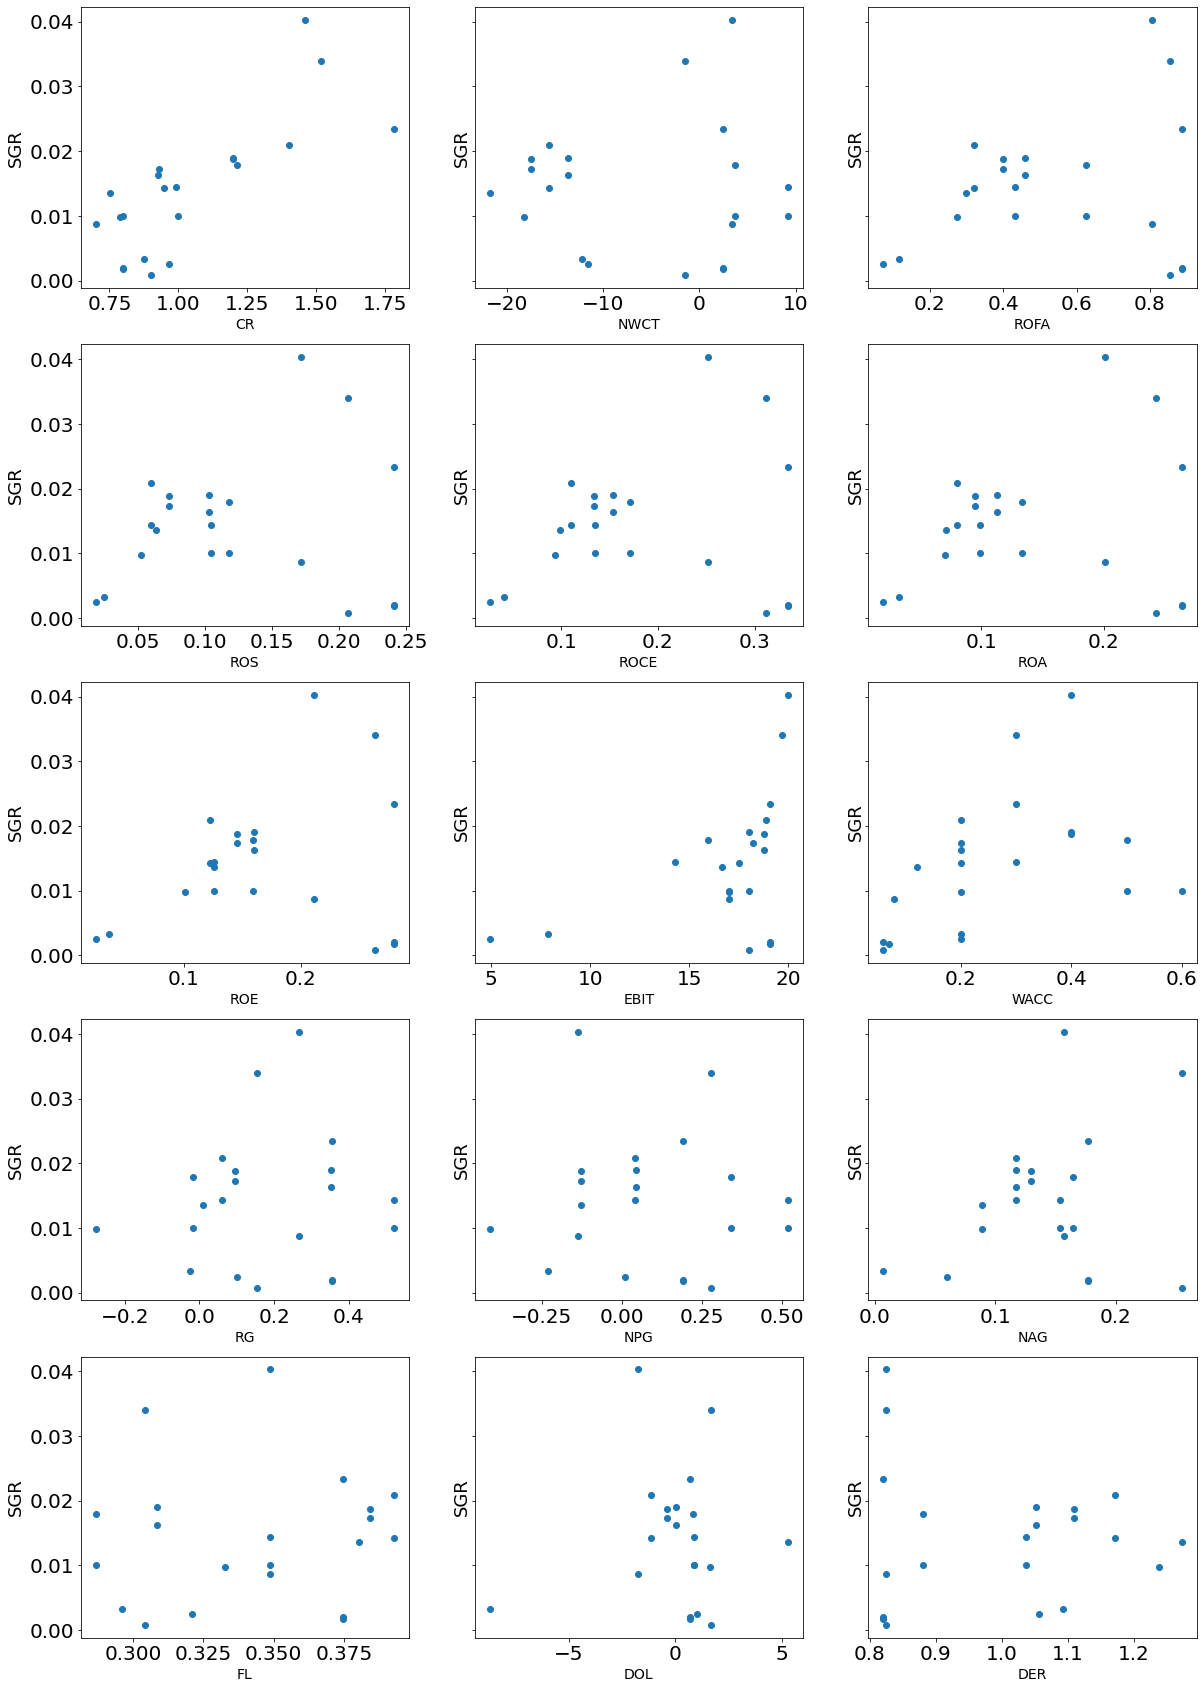

In [115]:
f, ax = plt.subplots(5, 3, sharey=True,figsize=(20,30))
for num,el in enumerate(X_columns):
    yy=int(num/3)
    xx=num%3
    ax[yy,xx].scatter(rfc2[el],rfc2.SGR)
    ax[yy,xx].set_ylabel('SGR',fontsize=18)
    ax[yy,xx].set_xlabel(el,fontsize=14)

In [116]:
ls=Lasso(alpha=0.1).fit(scc2[X_columns],scc2.SGR)
XX=np.array(X_columns)
np.array(list(zip(XX[np.abs(ls.coef_)>0.001],ls.coef_[np.abs(ls.coef_)>0.001])))

array([['CR', '0.5818655004573305'],
       ['EBIT', '0.20443100372260176'],
       ['WACC', '0.14299289203128146'],
       ['NPG', '-0.1251602867303125']], dtype='<U19')

In [117]:
m1 = smf.ols('SGR ~ CR + EBIT + WACC + NPG',data=scc2)
fitted = m1.fit(cov_type='HC1')
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    SGR   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     10.52
Date:                Sat, 15 Aug 2020   Prob (F-statistic):           0.000225
Time:                        21:09:01   Log-Likelihood:                -14.723
No. Observations:                  21   AIC:                             39.45
Df Residuals:                      16   BIC:                             44.67
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.939e-17      0.122   5.69e-16      1.0

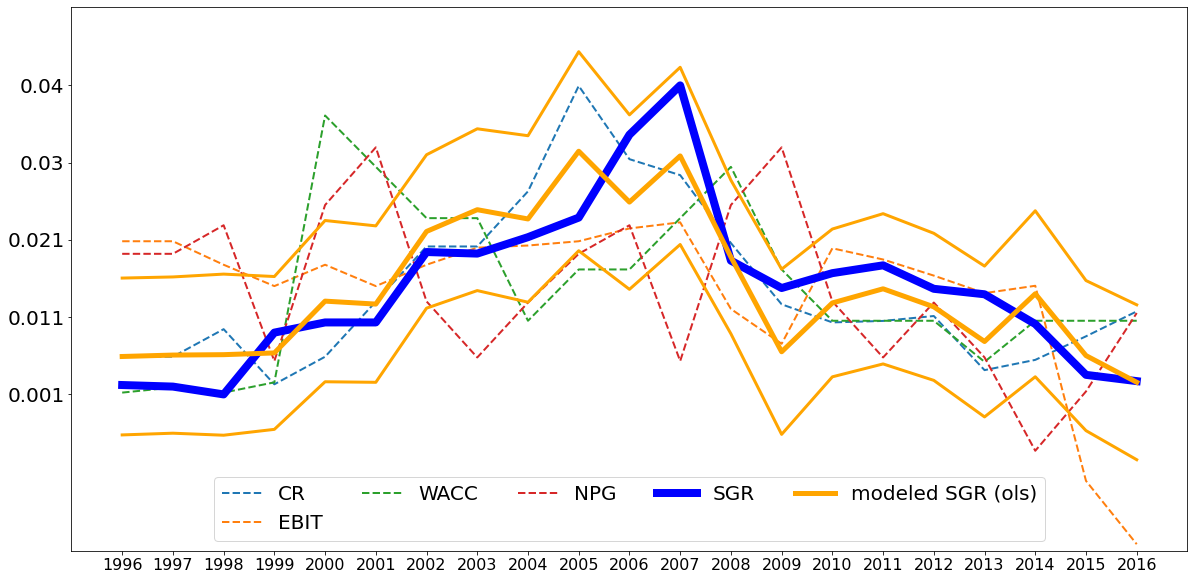

In [118]:
yuyr=np.round(np.linspace(rfc2.SGR.min(),rfc2.SGR.max(),5),3)
yuyf=np.linspace(scc2.SGR.min(),scc2.SGR.max(),5)

predictions = fitted.get_prediction(scc2)
frame = predictions.summary_frame(alpha=0.1)
frame.index=scc2.index
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = 20
plt.ylim(yuyf[0]-2,yuyf[-1]+1)
plt.plot(scc2[['CR', 'EBIT', 'WACC', 'NPG']],linewidth=2,ls='--') 
plt.plot(scc2[['SGR']],linewidth=8,color='blue')
plt.plot(frame['mean'],linewidth=5,color='orange')
plt.plot(frame['obs_ci_lower'],linewidth=3,color='orange')
plt.plot(frame['obs_ci_upper'],linewidth=3,color='orange')

plt.legend(['CR', 'EBIT', 'WACC', 'NPG','SGR', 'modeled SGR (ols)'], 
           loc="lower center",ncol=5)
plt.xticks(range(1996,2017),range(1996,2017),fontsize=16)
plt.yticks(yuyf,yuyr)
plt.show()


